**Aim:** Data Visualization and Storytelling
*   Create meaningful visualizations using data visualization tools
*   Combine multiple visualizations to tell a compelling data story.
*   Present the findings and insights in a clear and concise manner.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots
plt.style.use("default")
sns.set_theme()

df = pd.read_csv("/content/Churn_Modelling.csv")

print("First 5 rows of dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe(include="all"))

First 5 rows of dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Summary Statistics:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


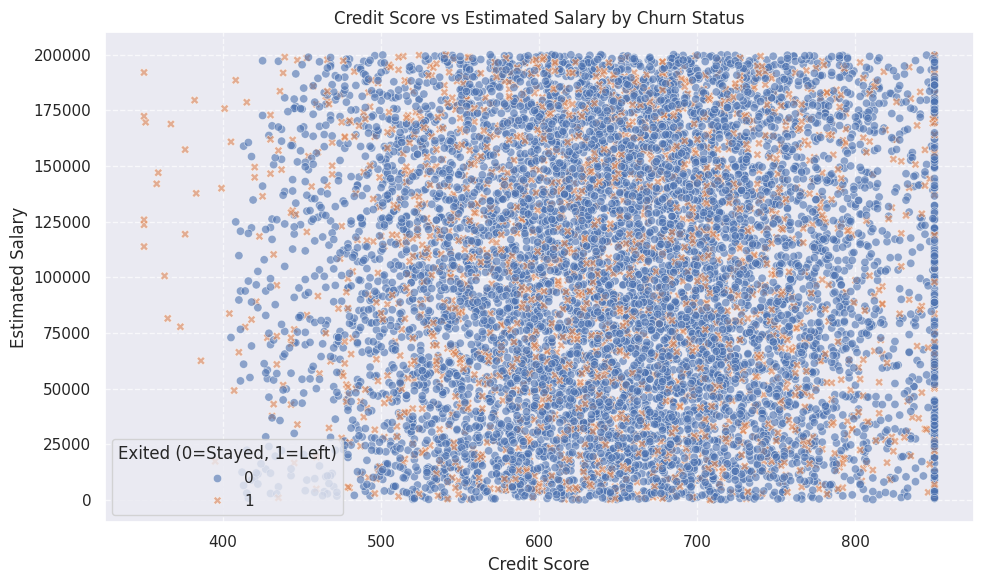

In [32]:
# -------- New Plot: Scatter Plot - CreditScore vs EstimatedSalary by Churn Status --------

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="CreditScore",
    y="EstimatedSalary",
    hue="Exited",
    style="Exited", # Use different markers for churned/non-churned
    alpha=0.6
)
plt.title("Credit Score vs Estimated Salary by Churn Status")
plt.xlabel("Credit Score")
plt.ylabel("Estimated Salary")
plt.legend(title="Exited (0=Stayed, 1=Left)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Observation: This scatter plot helps identify if there are any specific clusters of customers (based on their credit score and estimated salary) that are more prone to churn.

/tmp/ipython-input-1697480778.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_rate = df.groupby('AgeGroup')['Exited'].mean().reset_index()


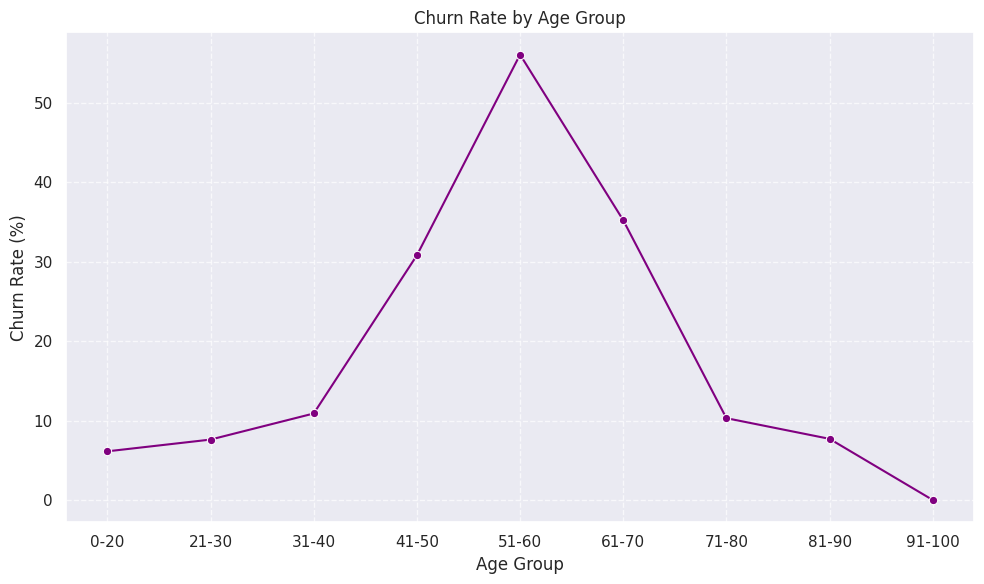

In [33]:
# -------- New Plot: Line Plot - Churn Rate by Age Group --------

# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate churn rate by age group
age_churn_rate = df.groupby('AgeGroup')['Exited'].mean().reset_index()
age_churn_rate['Exited_Percentage'] = age_churn_rate['Exited'] * 100

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=age_churn_rate,
    x="AgeGroup",
    y="Exited_Percentage",
    marker='o', # Add markers to points
    color='purple'
)
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Clean up the temporary AgeGroup column if not needed later
df.drop(columns=['AgeGroup'], inplace=True, errors='ignore')

Observation: This line plot clearly illustrates how the churn rate varies across different age demographics, providing insights into which age groups are most susceptible to churn.

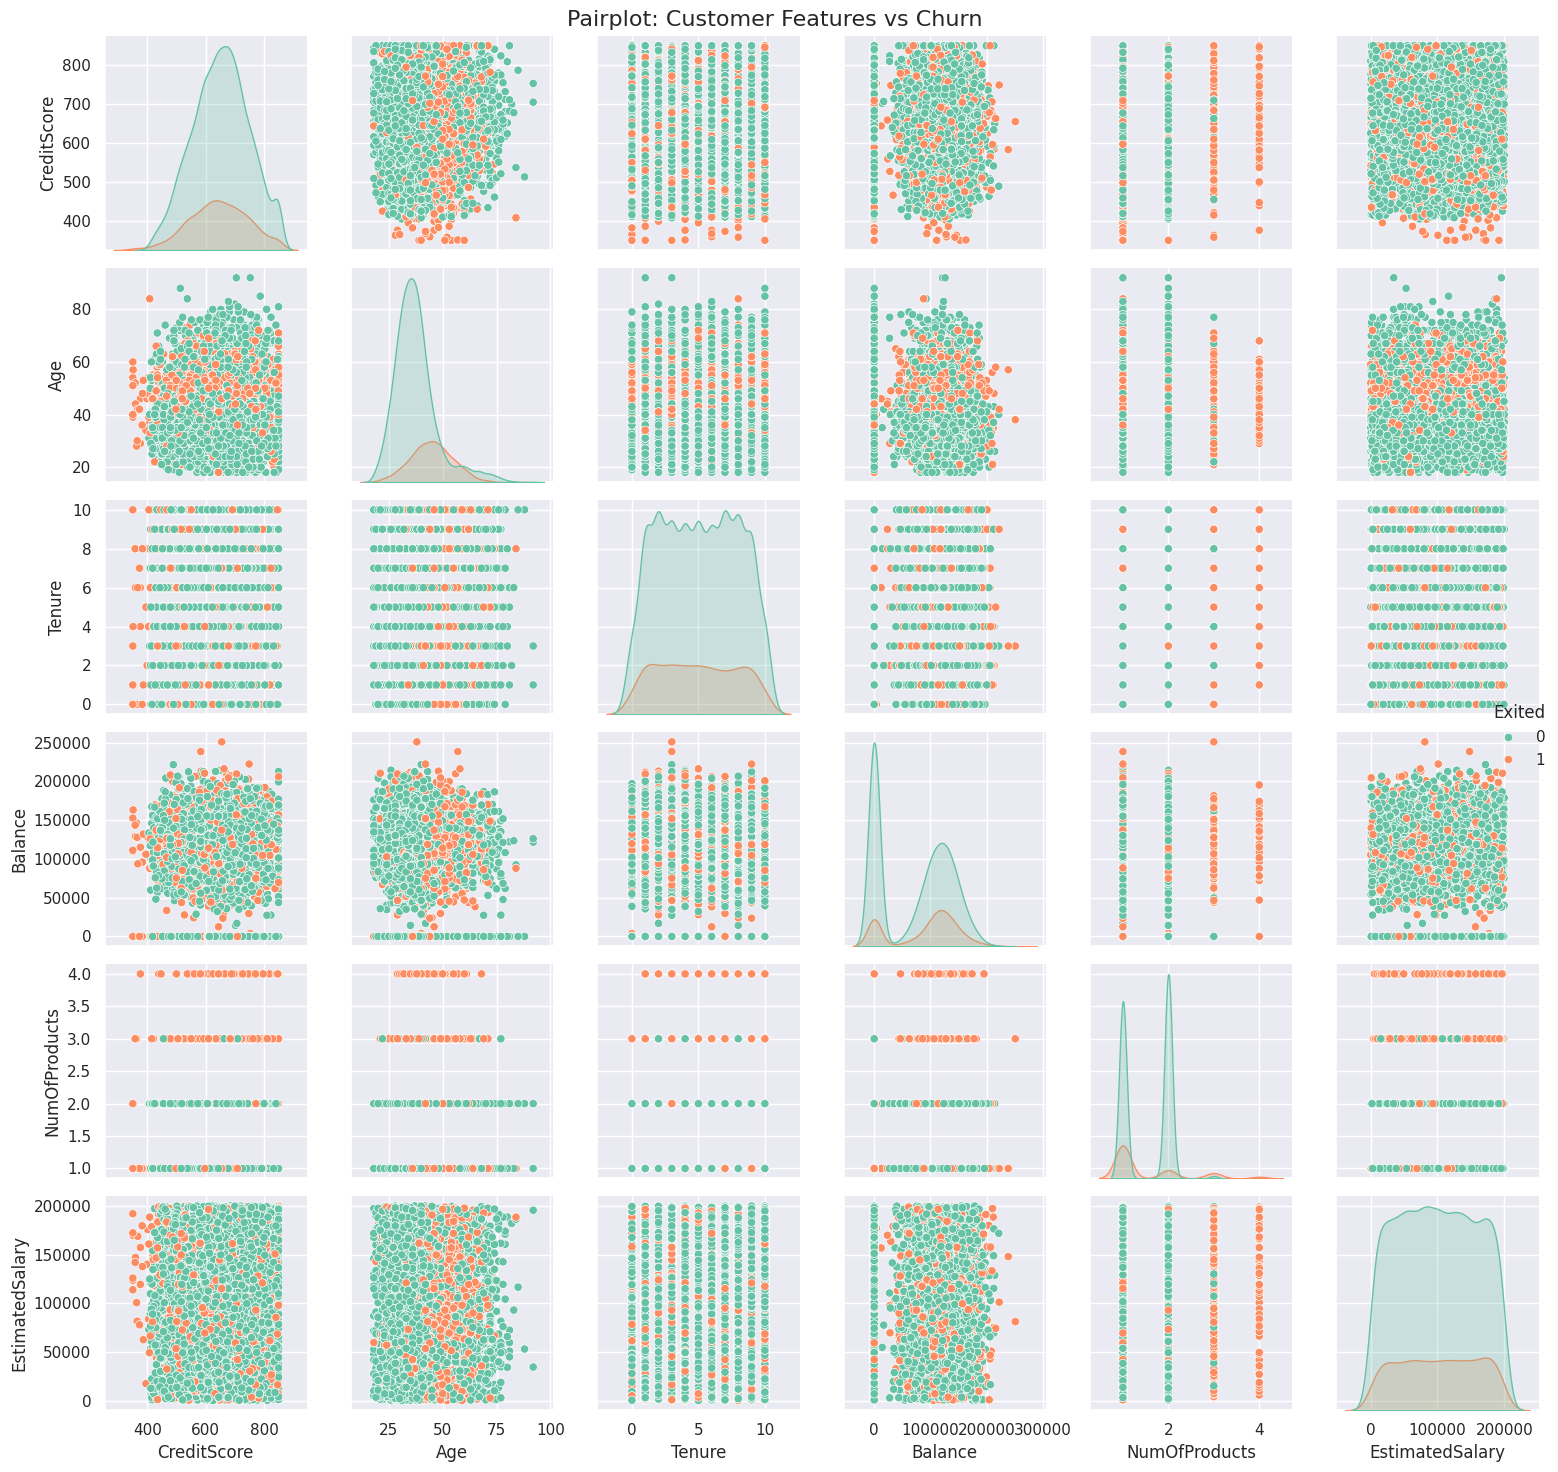

In [2]:
# Remove RowNumber, CustomerId, Surname (not useful)
churn = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance',
                  'NumOfProducts', 'EstimatedSalary']

sns.pairplot(churn[numerical_cols + ['Exited']],
             hue='Exited', palette="Set2")

plt.suptitle("Pairplot: Customer Features vs Churn", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2102288267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Exited", y="Balance", data=churn, palette="Pastel1")


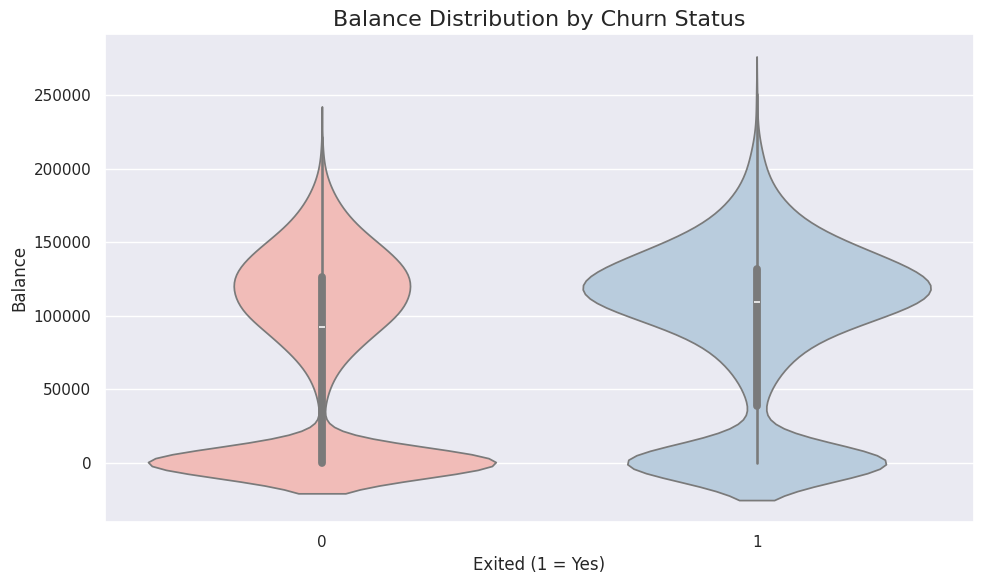

In [3]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Exited", y="Balance", data=churn, palette="Pastel1")
plt.title("Balance Distribution by Churn Status", fontsize=16)
plt.xlabel("Exited (1 = Yes)")
plt.ylabel("Balance")
plt.tight_layout()
plt.show()


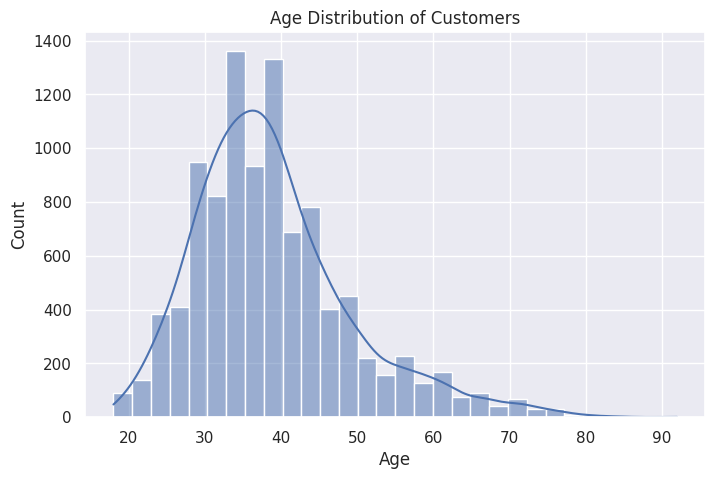

Observation: The age distribution shows which age groups form the majority of customers.


In [4]:
# -------- Cell 4: Distribution of Age --------
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Insight (printed text)
print("Observation: The age distribution shows which age groups form the majority of customers.")


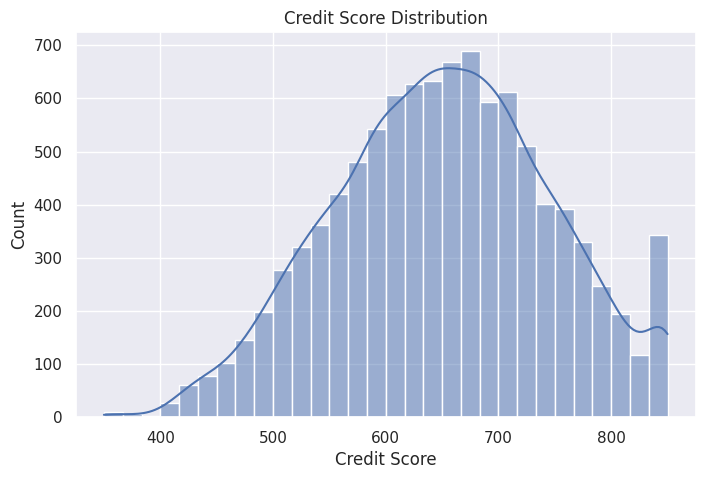

Observation: This plot helps see whether customers mostly have moderate, low, or high credit scores.


In [5]:
# -------- Cell 5: Distribution of Credit Score --------
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="CreditScore", bins=30, kde=True)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

print("Observation: This plot helps see whether customers mostly have moderate, low, or high credit scores.")


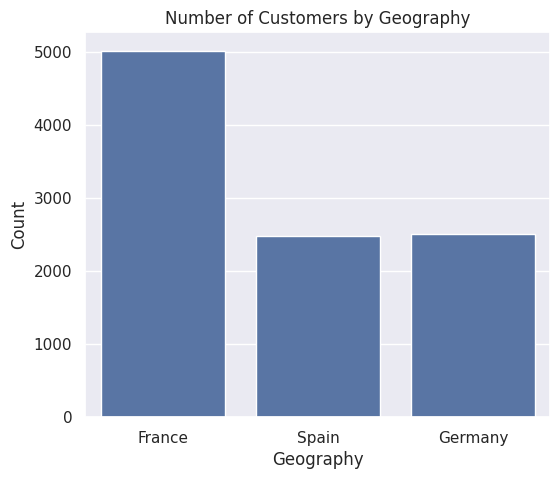

Observation: This shows how the customer base is distributed across countries.


In [6]:
# -------- Cell 6: Countplot of Geography --------
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Geography")
plt.title("Number of Customers by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

print("Observation: This shows how the customer base is distributed across countries.")


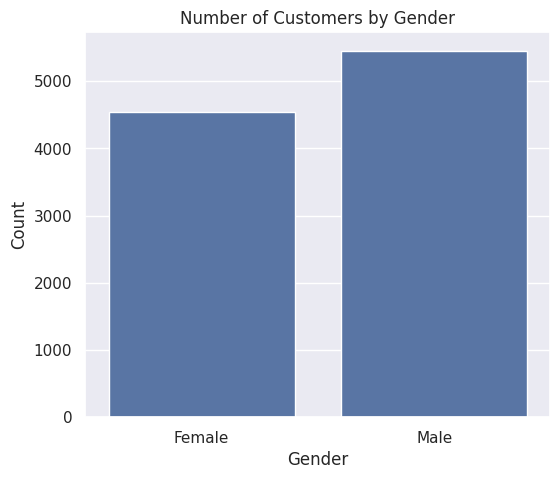

Observation: This shows the gender distribution of customers.


In [7]:
# -------- Cell 7: Countplot of Gender --------
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Gender")
plt.title("Number of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print("Observation: This shows the gender distribution of customers.")


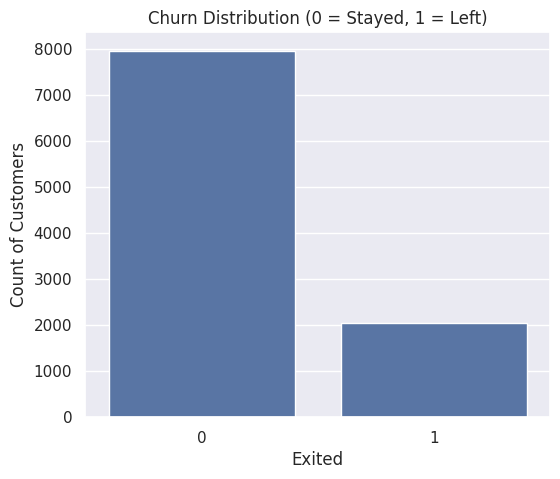

Overall Churn Rate: 20.37%
Observation: This tells us what proportion of customers have left the bank.


In [8]:
# -------- Cell 8: Customer Churn Distribution --------
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Exited")
plt.title("Churn Distribution (0 = Stayed, 1 = Left)")
plt.xlabel("Exited")
plt.ylabel("Count of Customers")
plt.show()

churn_rate = df["Exited"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")
print("Observation: This tells us what proportion of customers have left the bank.")


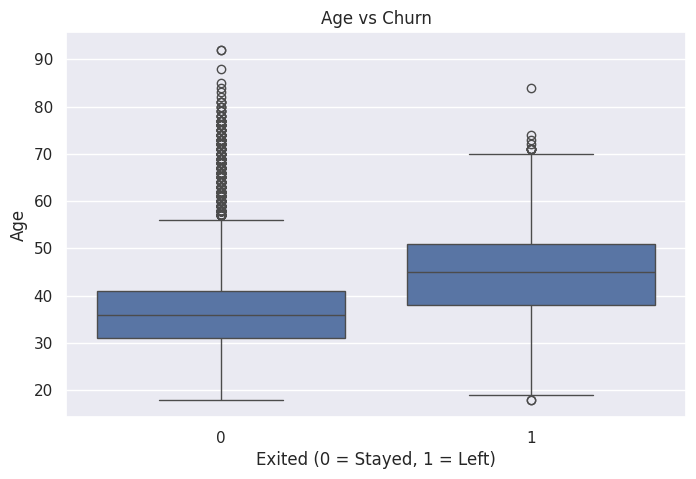

Observation: We can see if people who left (Exited=1) tend to be older or younger compared to those who stayed.


In [9]:
# -------- Cell 9: Age vs Churn (Boxplot) --------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Exited", y="Age")
plt.title("Age vs Churn")
plt.xlabel("Exited (0 = Stayed, 1 = Left)")
plt.ylabel("Age")
plt.show()

print("Observation: We can see if people who left (Exited=1) tend to be older or younger compared to those who stayed.")


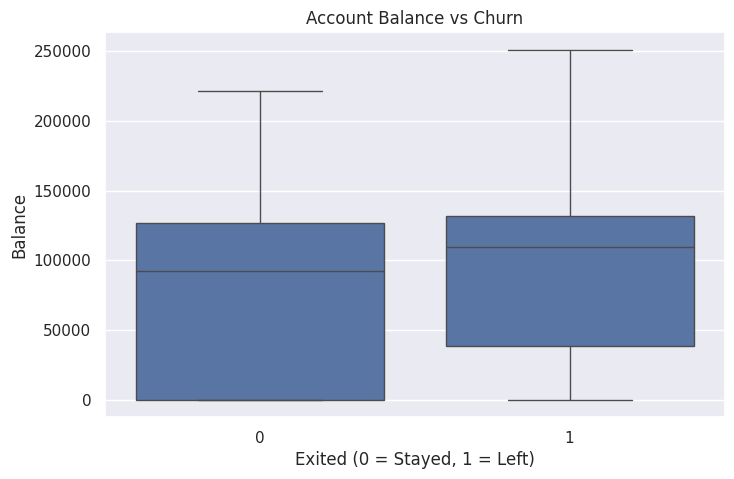

Observation: This shows whether customers with higher or lower balances are more likely to churn.


In [10]:
# -------- Cell 10: Balance vs Churn (Boxplot) --------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title("Account Balance vs Churn")
plt.xlabel("Exited (0 = Stayed, 1 = Left)")
plt.ylabel("Balance")
plt.show()

print("Observation: This shows whether customers with higher or lower balances are more likely to churn.")


Churn Rate by Geography (%):


,Geography,Exited
0,France,16.154767
1,Germany,32.443204
2,Spain,16.673395


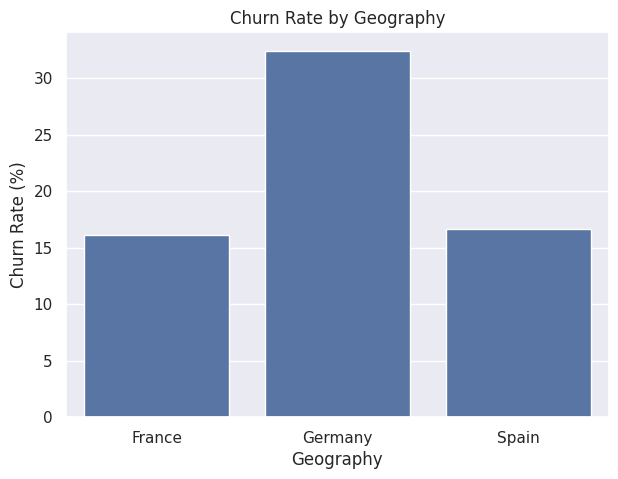

Observation: This tells us which country has the highest churn percentage.


In [11]:
# -------- Cell 11: Geography vs Churn (Churn Rate by Country) --------
geo_churn = df.groupby("Geography")["Exited"].mean().reset_index()
geo_churn["Exited"] = geo_churn["Exited"] * 100  # convert to %
print("Churn Rate by Geography (%):")
display(geo_churn)

plt.figure(figsize=(7,5))
sns.barplot(data=geo_churn, x="Geography", y="Exited")
plt.title("Churn Rate by Geography")
plt.xlabel("Geography")
plt.ylabel("Churn Rate (%)")
plt.show()

print("Observation: This tells us which country has the highest churn percentage.")


Churn Rate by Gender (%):


,Gender,Exited
0,Female,25.071539
1,Male,16.455928


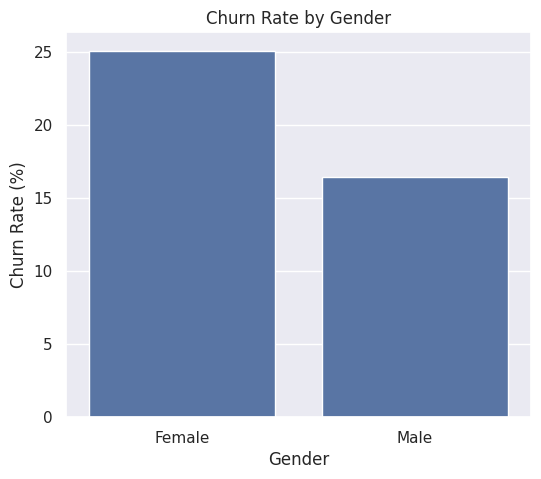

Observation: This shows whether male or female customers are more likely to leave.


In [12]:
# -------- Cell 12: Gender vs Churn (Churn Rate by Gender) --------
gender_churn = df.groupby("Gender")["Exited"].mean().reset_index()
gender_churn["Exited"] = gender_churn["Exited"] * 100
print("Churn Rate by Gender (%):")
display(gender_churn)

plt.figure(figsize=(6,5))
sns.barplot(data=gender_churn, x="Gender", y="Exited")
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

print("Observation: This shows whether male or female customers are more likely to leave.")


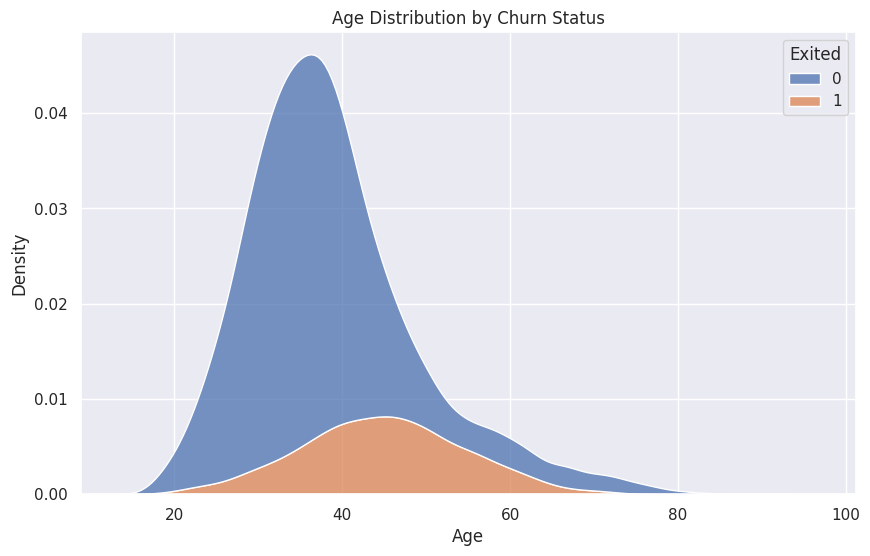

Observation: This plot shows how the age distribution differs for churned vs non-churned customers.


In [13]:
# -------- Cell 13: Churn by Age & Gender (KDE / Distribution) --------
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df,
    x="Age",
    hue="Exited",
    multiple="stack"
)
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

print("Observation: This plot shows how the age distribution differs for churned vs non-churned customers.")


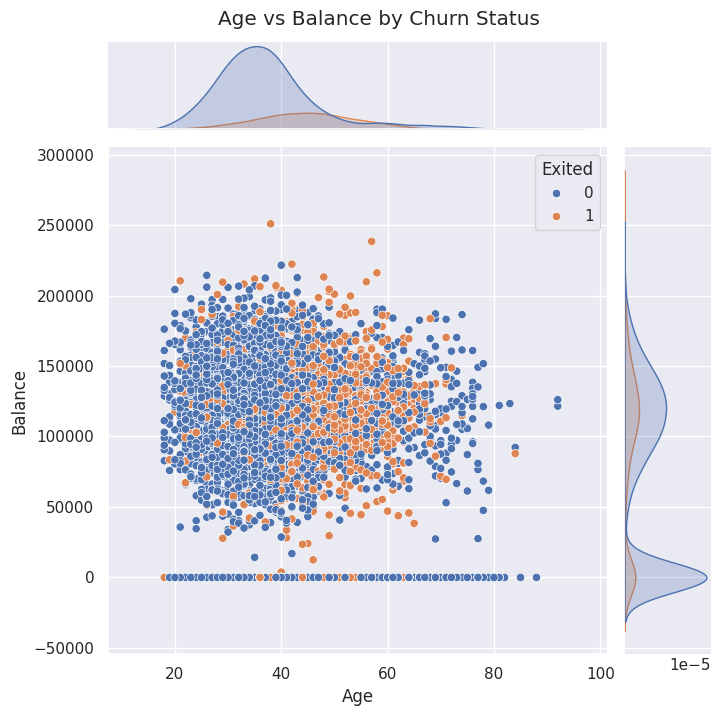

Observation: This helps see if certain age-balance combinations are more likely to churn.


In [14]:
# -------- Cell 14: Joint plot - Age vs Balance colored by Churn --------
# (jointplot creates its own figure, so no plt.figure needed)
sns.jointplot(
    data=df,
    x="Age",
    y="Balance",
    hue="Exited",
    kind="scatter",
    height=7
)
plt.suptitle("Age vs Balance by Churn Status", y=1.02)
plt.show()

print("Observation: This helps see if certain age-balance combinations are more likely to churn.")


Customer counts by Geography and Churn:


,Stayed (0),Left (1)
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


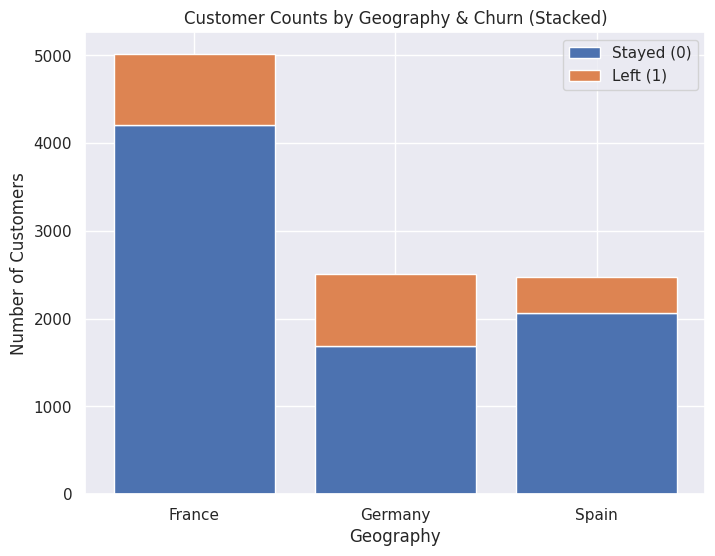

Observation: This shows both the total customers and churn split for each geography.


In [15]:
# -------- Cell 15: Stacked Bar - Geography & Churn --------
geo_counts = df.groupby(["Geography", "Exited"]).size().reset_index(name="Count")
geo_pivot = geo_counts.pivot(index="Geography", columns="Exited", values="Count")
geo_pivot.columns = ["Stayed (0)", "Left (1)"]

print("Customer counts by Geography and Churn:")
display(geo_pivot)

# Stacked bar plot
plt.figure(figsize=(8,6))
bottom_vals = None
for col in geo_pivot.columns:
    if bottom_vals is None:
        plt.bar(geo_pivot.index, geo_pivot[col])
        bottom_vals = geo_pivot[col]
    else:
        plt.bar(geo_pivot.index, geo_pivot[col], bottom=bottom_vals)
        bottom_vals = bottom_vals + geo_pivot[col]

plt.title("Customer Counts by Geography & Churn (Stacked)")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.legend(geo_pivot.columns)
plt.show()

print("Observation: This shows both the total customers and churn split for each geography.")


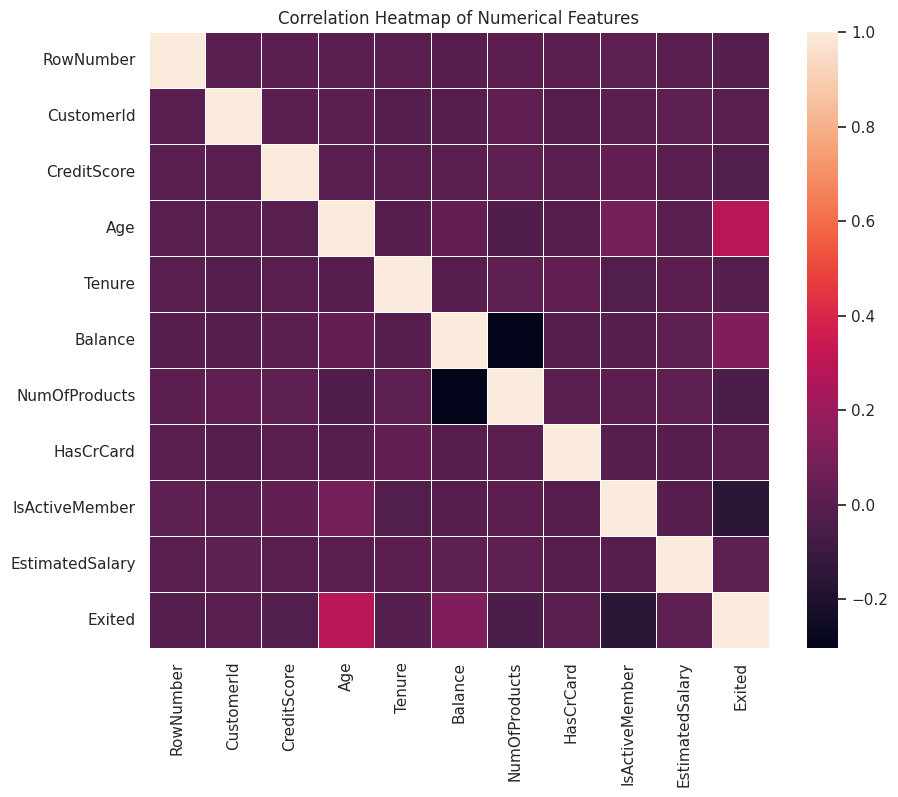

Observation: The heatmap highlights which numerical features are positively or negatively correlated.


In [16]:
# -------- Cell 16: Correlation Heatmap --------
# Keep only numeric columns
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
corr = num_df.corr()
sns.heatmap(corr, annot=False, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

print("Observation: The heatmap highlights which numerical features are positively or negatively correlated.")


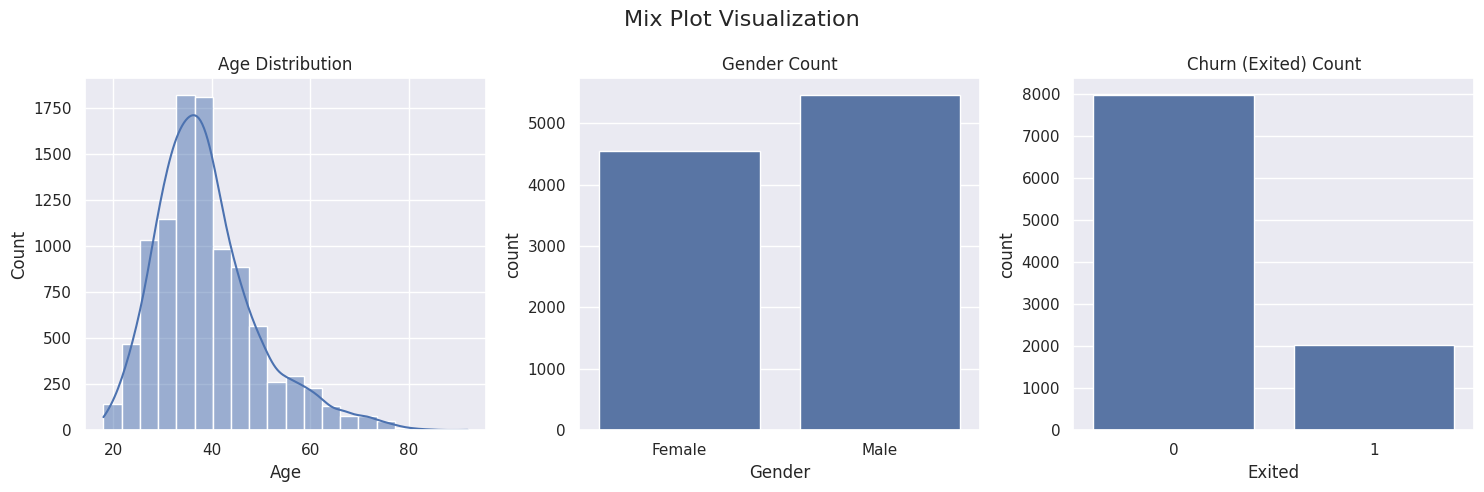

In [17]:
# -------- MIX PLOT (Multiple Plots in One Figure) --------

plt.figure(figsize=(15, 5))

# Plot 1 - Histogram of Age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")

# Plot 2 - Gender Count
plt.subplot(1, 3, 2)
sns.countplot(data=df, x="Gender")
plt.title("Gender Count")

# Plot 3 - Churn Count
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="Exited")
plt.title("Churn (Exited) Count")

plt.suptitle("Mix Plot Visualization", fontsize=16)
plt.tight_layout()
plt.show()


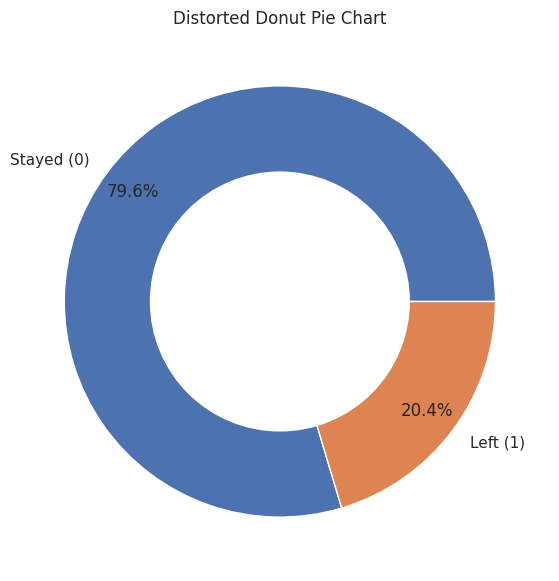

In [19]:
# -------- DONUT PIE CHART (Distorted by Hole) --------
churn_counts = df['Exited'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    churn_counts,
    labels=['Stayed (0)', 'Left (1)'],
    autopct='%1.1f%%',
    pctdistance=0.85
)

# Create circle for donut
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distorted Donut Pie Chart")
plt.show()


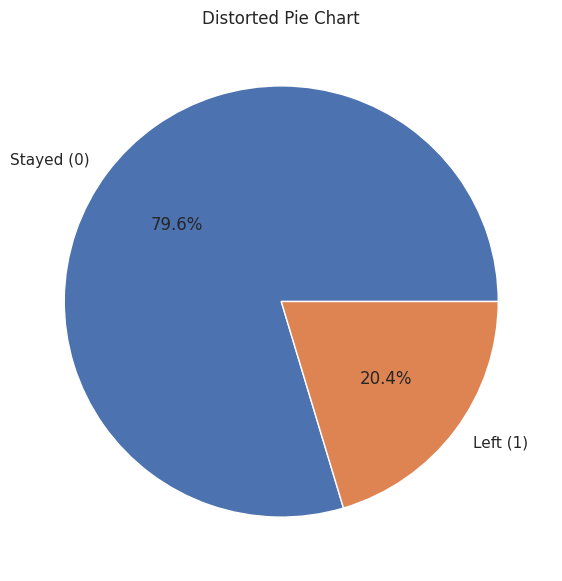

In [26]:
# -------- TILTED / OVAL PIE CHART (Distorted by Aspect Ratio) --------

plt.figure(figsize=(7, 7))  # wide figure → distortion
plt.pie(
    churn_counts,
    labels=['Stayed (0)', 'Left (1)'],
    autopct='%1.1f%%'
)
plt.title("Distorted Pie Chart")
plt.gca().set_aspect("auto")  # removes equal scaling → distortion
plt.show()


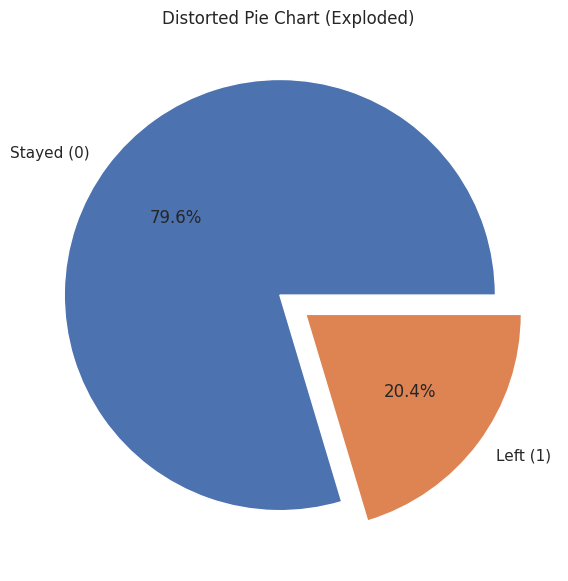

In [29]:
# -------- EXPLODED PIE CHART (Distortion by Explosion) --------

explode = (0.05, 0.10)  # amount of distortion

plt.figure(figsize=(7, 7))
plt.pie(
    churn_counts,
    labels=['Stayed (0)', 'Left (1)'],
    autopct='%1.1f%%',
    explode=explode
)
plt.title("Distorted Pie Chart (Exploded)")
plt.show()


In [23]:
# -------- Cell 17: Summary Story (Text Output) --------

print("===== DATA STORY & KEY INSIGHTS =====\n")

# Overall churn rate
print(f"1) Overall churn rate is around {churn_rate:.2f}%. This tells us how serious the churn problem is.\n")

print("2) Age:")
print("- Customers who left tend to be relatively older (seen from Age vs Churn boxplot).")
print("- Younger customers seem more likely to stay.\n")

print("3) Geography:")
print("- Churn rate by geography shows that some countries have significantly higher churn.")
print("- This may indicate regional issues such as local competition or dissatisfaction.\n")

print("4) Balance & Churn:")
print("- Balance vs Churn shows whether high-balance customers are at risk of leaving.")
print("- This helps prioritize retention strategies for valuable customers.\n")

print("5) Gender:")
print("- Gender-based churn differences (if any) can help in designing targeted communication.\n")

print("6) Correlation Heatmap:")
print("- Correlation between features like Age, Tenure, Balance, and Exited helps understand which factors are linked to churn.")
print("- This can guide future predictive modeling (e.g., logistic regression, decision trees).\n")

print("Overall Conclusion:")
print("- Visualizations together tell a story about which types of customers are at high risk of churn.")
print("- The bank can use these insights to design marketing campaigns, loyalty programs, and personalized offers.")


===== DATA STORY & KEY INSIGHTS =====

1) Overall churn rate is around 20.37%. This tells us how serious the churn problem is.

2) Age:
- Customers who left tend to be relatively older (seen from Age vs Churn boxplot).
- Younger customers seem more likely to stay.

3) Geography:
- Churn rate by geography shows that some countries have significantly higher churn.
- This may indicate regional issues such as local competition or dissatisfaction.

4) Balance & Churn:
- Balance vs Churn shows whether high-balance customers are at risk of leaving.
- This helps prioritize retention strategies for valuable customers.

5) Gender:
- Gender-based churn differences (if any) can help in designing targeted communication.

6) Correlation Heatmap:
- Correlation between features like Age, Tenure, Balance, and Exited helps understand which factors are linked to churn.
- This can guide future predictive modeling (e.g., logistic regression, decision trees).

Overall Conclusion:
- Visualizations together t